# Analisis Base de Datos 'Titanic'

# Explorando el Titanic a través del Análisis de Datos

El análisis de datos es una disciplina que implica la exploración, limpieza y modelado de información para revelar patrones y tendencias. A través de herramientas estadísticas y visuales, buscamos extraer conocimientos significativos que respalden decisiones informadas en diversos ámbitos.

## Herramientas Visuales: Gráficos y Tablas

En este viaje de descubrimiento, nos apoyaremos en gráficos y tablas como herramientas cruciales. Estos elementos visuales no solo hacen que los datos sean comprensibles, sino que también permiten identificar patrones visuales y comunicar hallazgos de manera efectiva. En la travesía del Titanic, estos recursos nos ayudarán a contar la historia detrás de los números.

## Presentando el Proyecto

En este proyecto, utilizaremos dos librerías fundamentales:

- *Pandas:* Facilitará la manipulación y análisis de datos tabulares.
- *Seaborn:* Brindará la capacidad de crear visualizaciones impactantes.

A través de estas herramientas, exploraremos el dataset del Titanic, desentrañando misterios y respondiendo preguntas clave sobre los factores que influyeron en la supervivencia durante este evento histórico.


#### Import de librerias

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

#### Carga de Base de Datos

In [7]:
# Importamos titanic.csv e indicamos que el indice sera la columna PassengerId

df = pd.read_csv('titanic.csv', index_col = 'PassengerId')

#### Mostramos los primeros 10 registros de nuestra tabla para verificar la carga

In [92]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Detalle de Contenido del Columnas del Dataset

**TITANIC Dataset**
* **Pclass** Clase del pasajero *(1 = 1st; 2 = 2nd; 3 = 3rd)*
* **Survived** Si el pasajero sobrevivió o no *(0 = No; 1 = Si)*
* **Name:** Nombre
* **Sex:** Sexo
* **Age:** Edad
* **Sibsp:** Número de hermanos / cónyuges a bordo
* **Parch:** Número de padres / niños a bordo
* **Ticket:** Numero de Ticket 
* **Fare:** Tarifa de pasajero *(libra esterlina)*
* **Cabin:** Cabina
* **Embarked:** Puerto de embarque *(C = Cherbourg; Q = Queenstown; S = Southampton)*

#### Obtenemos informacion general de la tabla

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Analisis:
- Tenemos 11 columnas en total
- Un total de 891 registros
- La tabla posee distintos tipos de datos, los mismos son:
    1. int64 (Survived, Pclass, SibSp, Parch)
    2. object (Name, Sex, Ticket, Cabin, Embarked)
    3. float64 (Age, Fare)
- Tenemos columnas con datos incompletos, estas son
    1. Age (posee 714 registros de 891)
    2. Cabin (posee 204 registros de 891)
    3. Embarked (posee 889 registros de 891)


#### Observamos un resumen de las medidas de cada columna del Dataframe

In [14]:
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Analisis:
- El promedio de pasajeros viajo en clase 2
- El 25% de los pasajeros estudiados viajo en clase 2 o superior, mientras que el analisis del 75% de los datos nos indica que viajaron en clase 3 o superior
- El promedio de edad de los pasajeros es de 29.69 a;os
- La edad minima observada en los pasajeros es de 0.42 años
- La edad maxima observada en los pasajeros es de 80 años
- La mayoria de las personas fueron con una persona o conyuge al bordo
- Al menos una persona viajo con 8 acomapañantes
- El valor promedio del boleto fue de 32 libras esterlinas
- El valor minimo del boleto registrado es de 0 libras esterlinas
- El valor maximo del boleto registrado es de 512 libras esterlinas

In [15]:
df[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Analisis
- Hubo una mayor cantidad de pasajeros masculinos en el barco, con un total de 577 de 891 pasajeros registrados
- Abordaron mas pasajeros en el Puerto de Embarque de Southampton, con un total de 644 pasajeros registrados
- El ticket 347082 se emitio 7 veces
- La cabina B96 B98 tuvo un total de 4 ocupantes.

### Calculamos las medidas estadisticas de las columnas que consideramos mas importantes

In [77]:
age_median = df['Age'].median()
fare_median = df['Fare'].median()
pclass_median = df['Pclass'].median()

age_mode = df['Age'].mode()
fare_mode = df['Fare'].mode()
pclass_mode = df['Pclass'].mode()

age_mean = df['Age'].mean()
fare_mean = df['Fare'].mean()
pclass_mean = df['Pclass'].mean()

titles = ['Promedio', 'Mediana', 'Moda']
col_age = [age_mean, age_median, age_mode]
col_fare = [fare_mean, fare_median, fare_mode]
col_pclass = [pclass_mean, pclass_median, pclass_mode]

df2 = pd.DataFrame()

df2['Medidas'] = titles
df2['Age'] = col_age
df2['Fare'] = col_fare
df2['Pclass'] = col_pclass

df2.head()

,Medidas,Age,Fare,Pclass
0,Promedio,29.699118,32.204208,2.308642
1,Mediana,28.0,14.4542,3.0
2,Moda,"0 24.0 Name: Age, dtype: float64","0 8.05 Name: Fare, dtype: float64","0 3 Name: Pclass, dtype: int64"


#### Usamos la función value_counts con cada columna categórica y hacemos un análisis de los valores únicos y sus frecuencias según veamos necesario.

In [19]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

> 491 Personas viajaron en 3ra clase

> 184 Personas viajaron en 2da clase

> 216 Personas viajaron en 1ra clase


In [21]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

> Sobrevivieron un total de 342 Pasajeros

In [22]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

> Habia un total de 577 pasajeros masculinos

> Habia un total de 314 pasajeros femeninos

In [24]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

> Habia un mayor numero de pasajeros registrados con la edad de 24 años

In [25]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

> El boleto mas adquirido fue el que tuvo un valor de 8 libras esterlinas

In [26]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

> En el Puerto de Embarque de Southampton abordaron 644 pasajeros

> En el Puerto de Embarque de Cherbourg abordaron 168 pasajeros

> En el Puerto de Embarque de Queenstown abordaron 77 pasajeros

### Relaciones entre columnas

#### Analisis de sobrevientes segun la clase en la que viajaron

In [33]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

#### Analisis
- De un total de 216 personas que viajaron en clase 1, sobrevivieron 136
- De un total de 184 personas que viajaron en clase 2, sobrevivieron 87
- De un total de 491 personas que viajaron en clase 3, sobrevivieron 119

#### Analisis de sobrevientes segun el sexo

In [63]:
df.groupby(['Sex', 'Survived'])['Name'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

#### Analisis
- De un total de 557 pasajeros masculinos, sobrevivieron 109
- De un total de 314 pasajeros femeninos, sobrevivieron 233

#### Analisis de sobrevientes segun el puerto de embarque

In [66]:
df.groupby(['Survived', 'Embarked'])['Name'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Name, dtype: int64

#### Analisis
- De un total de 644 pasajeros que abordaron en Southampton
    1. 427 fallecieron
    2. 217 sobrevivieron
- De un total de 168 pasajeros que abordaron en Cherbourg
    1. 75 fallecieron
    2. 93 sobrevivieron
- De un total de 77 pasajeron que abordaron en Queenstown
    1. 47 fallecieron
    2. 30 sobrevivieron

### Manejo de Datos faltantes

#### Verificar si hay datos faltantes

In [78]:
df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


> Vamos a eliminar la columna **Cabin**, la misma consideramos que no es de gran impacto en nuestro analisis y ademas la misma tiene un gran faltante de datos


### Eliminar Columna definitivamente

In [80]:
df.drop(columns = 'Cabin', inplace = True)

# Mostramos como queda conformada la tabla

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


> Aun asi eliminada la columna Cabin, en **Age** tenemos aun datos faltantes, por lo cual no podemos tener los mejores resultados al realizar nuestros analisis

### Opciones de gestionar este problema

- **Eliminar registros que no posean el dato en Age**: Esto aminoraria la cantida de registros y modificaria los valores obtenidos en otras columnas, por lo cual no es lo mejor

- **Reemplazar el dato faltante por otro que no modifique los valores ya obtenidos**: Esta suele ser la opcion mas viable, debido a que podemos reemplazar los valores faltantes por el **promedio** de las edades, lo cual no modificaria las metricas ya obtenidas en edad y tampoco las medidas estadisticas calculadas en otras columnas

In [82]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [93]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Representacion grafica de los resultados obtenidos

#### Mediante diferentes graficos vamos a representar la relacion entre valores obtenidos del analisis

- #### Total de sobrevivientes por clase

<Axes: xlabel='Pclass', ylabel='Survived'>

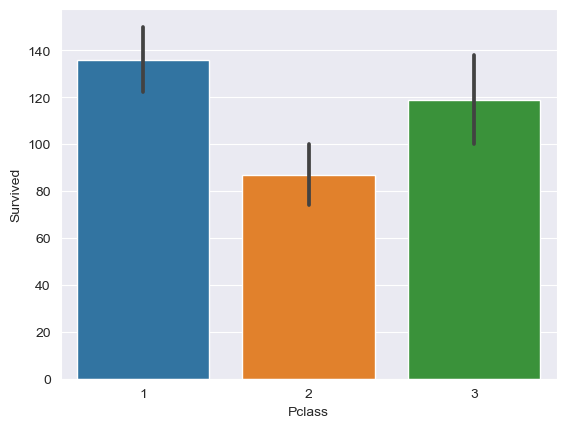

In [87]:
sns.barplot(x='Pclass', y ='Survived' , estimator = np.sum, data=df)

# np.sum --> suma los registros

- #### Total de sobrevivientes por clase discriminado por sexo

<Axes: xlabel='Pclass', ylabel='Survived'>

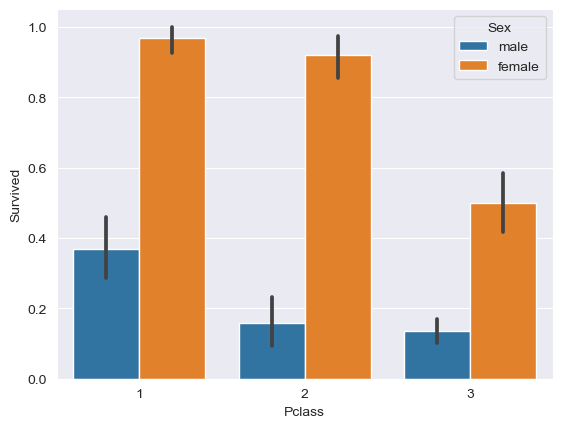

In [88]:

sns.barplot(x='Pclass', y ='Survived' , hue ='Sex' , estimator = np.mean, data=df)

# hue --> Parametro discriminante | Va a separar el grafico para dar detalles en base a este parametro

- #### Distribucion de la edad de los pasajeros - Agrupando edades en 10

<Axes: xlabel='Age', ylabel='Count'>

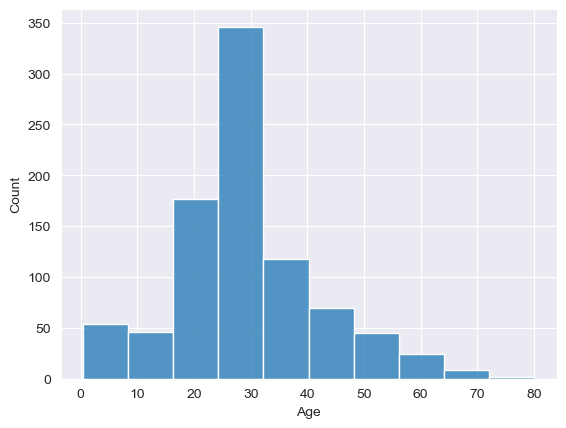

In [89]:
sns.histplot(df['Age'], bins = 10 , kde = False)

# bins --> Cantidad de columnas que deseamos que aparezcan en el grafico

- ### Distribucion de edad

<Axes: ylabel='Age'>

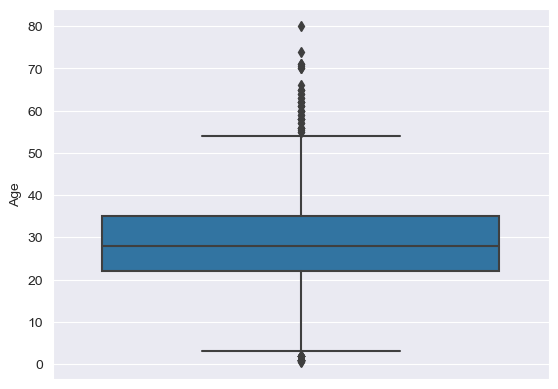

In [91]:
# Boxplot Age
sns.boxplot(y = 'Age', orient="v", data =df )


- ##### La caja indica que el 50% de nuestros datos abarca esos valores
- ##### La linea recta indica la mediana
- ##### Los bigotes (inferior y superior) indican la distribucion (min, max) de nuestros valores sin valores atipicos
- ##### Los puntos fuera de los bigotes son los datos atipicos